# An Introductory Case Study

BBC News Article Classification!

In [1]:
import pandas as pd
df = pd.read_csv('British_Broadcasting_data.csv')
df.head()

,data,labels
0,Musicians to tackle US red tape Musicians gro...,entertainment
1,"U2s desire to be number one U2, who have won ...",entertainment
2,Rocker Doherty in on-stage fight Rock singer ...,entertainment
3,Snicket tops US box office chart The film ada...,entertainment
4,"Oceans Twelve raids box office Oceans Twelve,...",entertainment


In [2]:
df['labels'].value_counts()

,count
labels,
sport,511
business,510
politics,417
tech,401
entertainment,386


# Installations

In [ ]:
#import gensim.downloader as api
#wv = api.load("glove-twitter-25")

In [3]:
  import nltk
  nltk.download('stopwords')
  nltk.download('punkt')
  nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

# A Brief Introduction to Text Analysis in Python

## 1. Overview of Text Analysis

#### 1.1 Common Use Cases

##### Document Clustering (Unsupervised)


The goal is to assign a topic to a document that is category it is previously unknown.

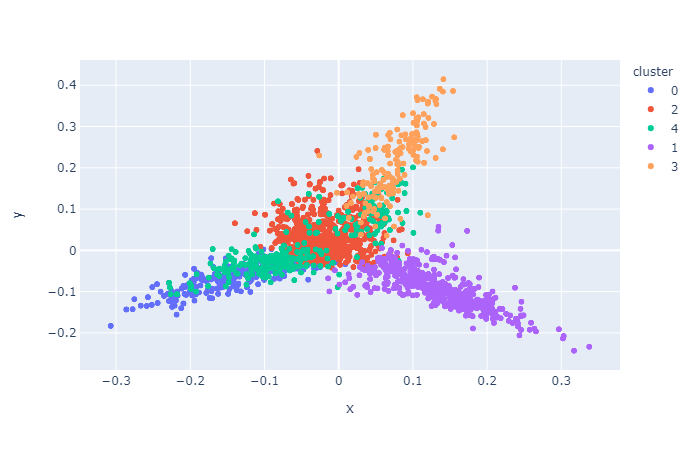

##### Document Classification (Supervised)

Text classification is a machine learning technique that assigns a set of predefined categories to open-ended text. Text classifiers can be used to organize, structure, and categorize pretty much any kind of text – from documents, medical studies and files, and all over the web.

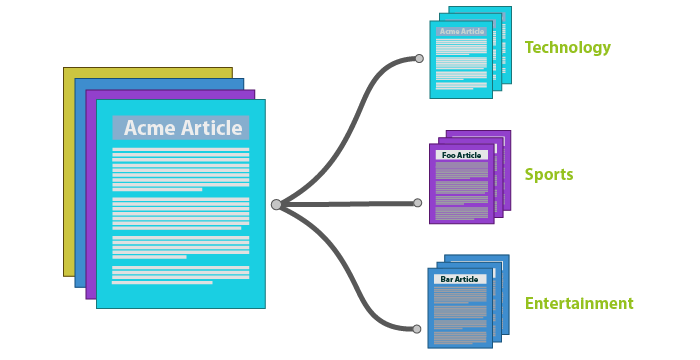

##### Sentiment Analysis
Sentiment analysis is the process of analyzing digital text to determine if the emotional tone of the message is positive, negative, or neutral.

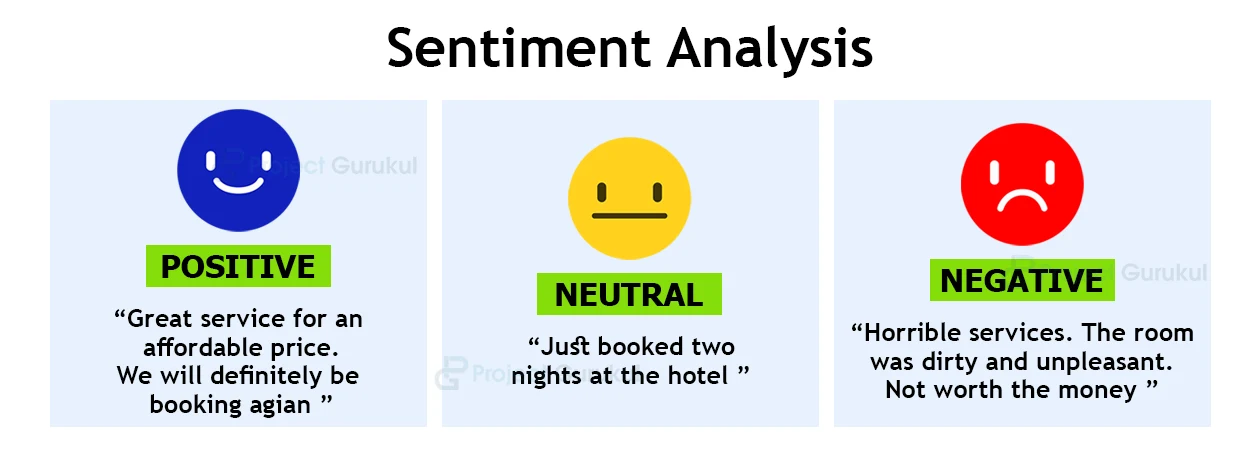

##### Topic Modeling

All topic models are based on the same basic assumption:

each document consists of a mixture of topics, and
each topic consists of a collection of words.
In other words, topic models are built around the idea that the semantics of our document are actually being governed by some hidden, or “latent,” variables that we are not observing. As a result, the goal of topic modeling is to uncover these latent variables — topics — that shape the meaning of our document and corpus. The rest of this blog post will build up an understanding of how different topic models uncover these latent topics.

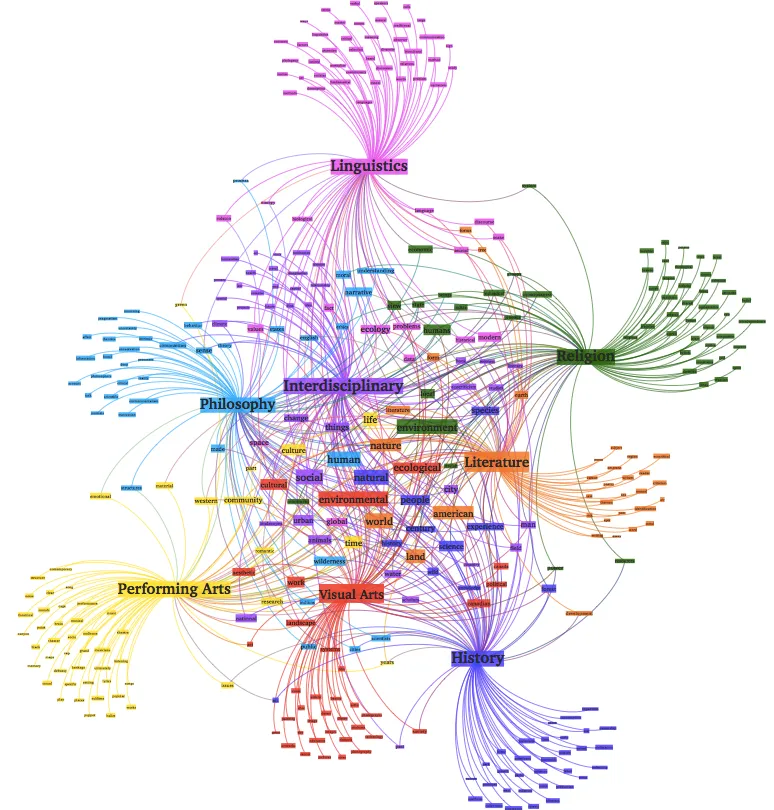

##### Information Extraction (e.g. NER)

Named entity recognition (NER) is a form of natural language processing (NLP) that involves extracting and identifying essential information from text

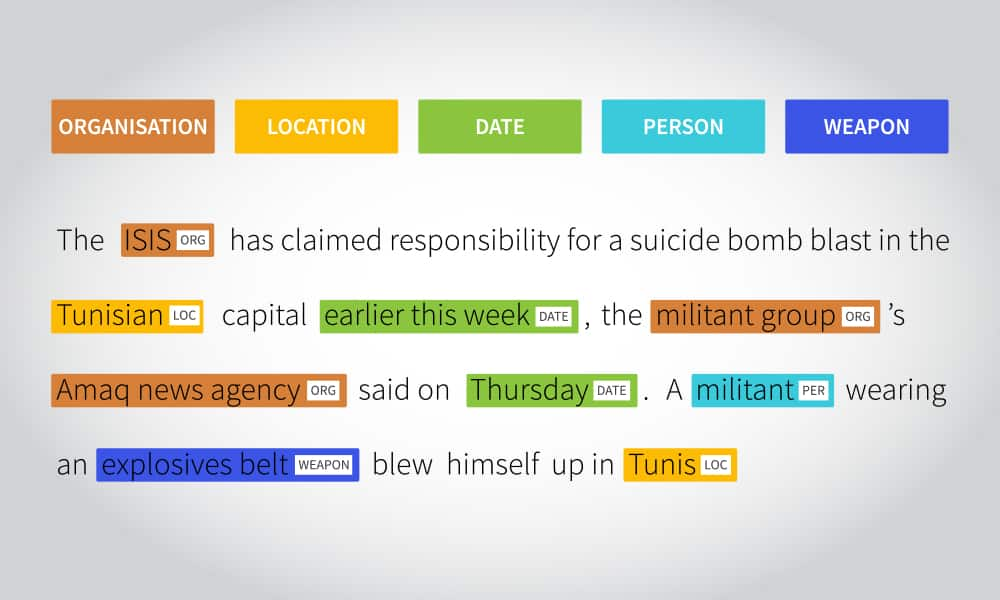

##### Translation

Machine learning has made great strides in translating text between languages

##### Natural Language Generation (e.g. text summarization, chatbot etc)


This is a fast-moving area of NLP, that has enabled computers to create text.

#### 1.2 Common Issues in Text Analysis

- Polysemy: Words with many meanings. What does bank mean in the following sentence?
```
They left the bank five minutes ago.
```
- Different word forms. How many forms for the word "run"?
```
The candidate is running for office.
The candidate ran for office.
```
- Casing, punctuation, unimportant prepositions
- Mispellings



#### 1.3 Why Text Analysis is Common?

Companies generally have immense amount of proprietary, or openly-available text that is cheap to collection. With all of this immense data sitting around, companies often try to find ways to turn it into business value

#### 1.4 Text Analysis Pipeline

Text analysis and NLP often has common pre-processing steps to prepare it for a final taske such as document classification, topic modeling etc.

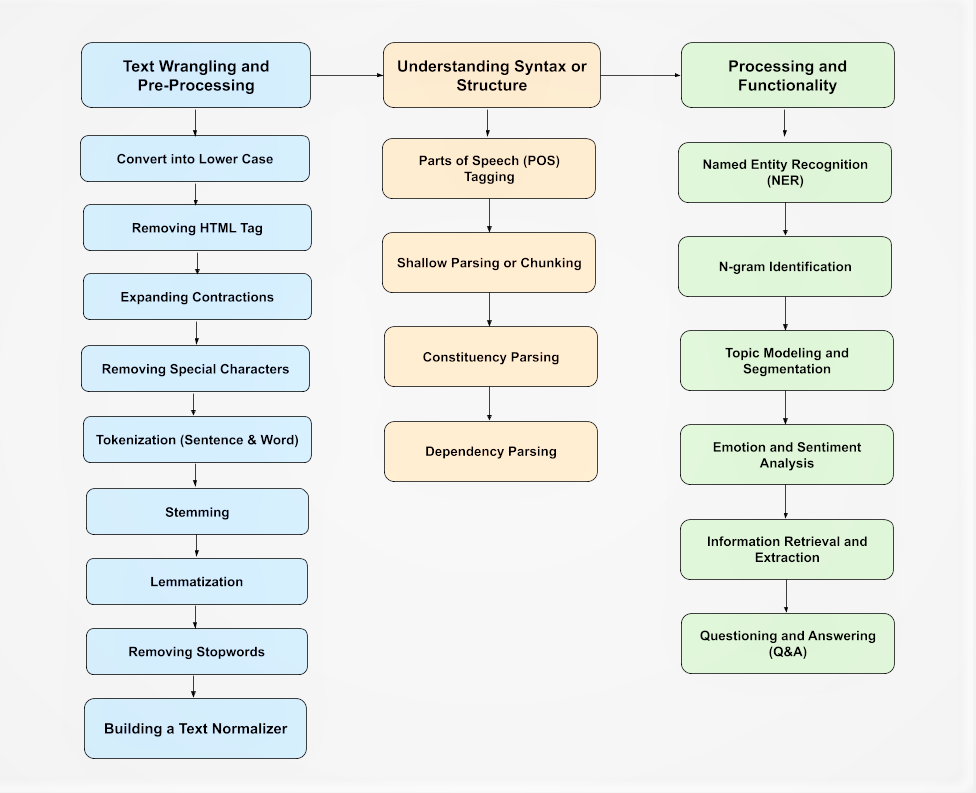

#### 1.5 Important Text Analysis Libraries in R and Python

**Python**


*   NLTK - Useful functions for cleaning text
*   spaCy - Useful machine learning models with base models for part-of-speech, NER etc
*   Gensim - Pre-built and trainable word vector models
*   AllenNLP - Hosts pre-trianed and trainable machine learning models
*   LDA - LDA topic modeling
*   RE - Python's base library for regular expressions
*   Sklearn




**R**
*   Quanteda
*   spacyR
*   Text2vec
*   Tidytext
*   Stringr
*   tm
*   Word2vec



#### 1.6 Vocab for Text Analysis

- **Document**: A single "piece" of text. Could be a news article, a book, or even just a sentence.
- **Corpus**: A collection of documents is a corpus.
-**Token**: A token is an instance of a sequence of characters in some particular document that are grouped together as a useful semantic unit for processing. Often times a token is a word.
- **Stemming**: a process that stems or removes last few characters from a word, often leading to incorrect meanings and spelling. e.g. stemming the word ‘Caring‘ would return ‘Car‘.
- **Lemmatization**: considers the context and converts the word to its meaningful base form, which is called Lemma. For instance, lemmatizing the word ‘Caring‘ would return ‘Care‘.

## 2. Text Preperation / Preprocessing
We will go over some basic preprocessing steps that are sometimes used for text analysis and NLP. There is no one list of preprocessing steps that you can follow, but instead you have to evaluate your use case and objectives, to determine how you want to preprocess data. For example, often times you may want to evaluate your text without taking into consideration casing, and treat a word as a word. But for the case of NER, casing is really important and helps it to understand if something may be a proper noun or not. There is no one-size-fits all.

For the remainder of this notebook, we will use the following simple dataframes

In [4]:
import pandas as pd
df = pd.DataFrame({"Documents":[
    "An owl stuck in an iconic sculpture. After rehab, it's free again.",
    "Murder suspect who escaped GWU Hospital last month is captured.",
    "In D.C. bill, Bowser aims to curb retail theft, drug dealing, police reform."
]})
df.head()

,Documents
0,An owl stuck in an iconic sculpture. After reh...
1,Murder suspect who escaped GWU Hospital last m...
2,"In D.C. bill, Bowser aims to curb retail theft..."


#### 2.1 Casing and punctuation

In [5]:
"hey".upper()

'HEY'

In [27]:
"N OWL STUCK IN AN ICONIC SCULPTURE. AFTER RE".replace('.', '')

'N OWL STUCK IN AN ICONIC SCULPTURE AFTER RE'

In [30]:
#-- Text to upper case
df['Documents_Cased'] = df['Documents'].str.upper()

#-- Remove Punctuation
import string
print(string.punctuation)
df['Documents_rmPunct'] = df['Documents_Cased'].str.replace('[{}]'.format(string.punctuation), '', regex=True)

df.head()

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


,Documents,Documents_Cased,Documents_rmPunct,Documents_tokenized,Documents_rmStops,Documents_Stemmed,Documents_Lemmatized
0,An owl stuck in an iconic sculpture. After reh...,AN OWL STUCK IN AN ICONIC SCULPTURE. AFTER REH...,AN OWL STUCK IN AN ICONIC SCULPTURE AFTER REHA...,"[AN, OWL, STUCK, IN, AN, ICONIC, SCULPTURE, .,...","[OWL, STUCK, ICONIC, SCULPTURE, ., REHAB, ,, '...","[owl, stuck, icon, sculptur, ., rehab, ,, 's, ...","[owl, stick, iconic, sculpture, ., rehab, ,, '..."
1,Murder suspect who escaped GWU Hospital last m...,MURDER SUSPECT WHO ESCAPED GWU HOSPITAL LAST M...,MURDER SUSPECT WHO ESCAPED GWU HOSPITAL LAST M...,"[MURDER, SUSPECT, WHO, ESCAPED, GWU, HOSPITAL,...","[MURDER, SUSPECT, ESCAPED, GWU, HOSPITAL, LAST...","[murder, suspect, escap, gwu, hospit, last, mo...","[murder, suspect, escape, gwu, hospital, last,..."
2,"In D.C. bill, Bowser aims to curb retail theft...","IN D.C. BILL, BOWSER AIMS TO CURB RETAIL THEFT...",IN DC BILL BOWSER AIMS TO CURB RETAIL THEFT DR...,"[IN, D.C., BILL, ,, BOWSER, AIMS, TO, CURB, RE...","[D.C., BILL, ,, BOWSER, AIMS, CURB, RETAIL, TH...","[d.c., bill, ,, bowser, aim, curb, retail, the...","[d.c., bill, ,, bowser, aim, curb, retail, the..."


#### 2.2 Strings to Tokens

In [23]:
from nltk.tokenize import word_tokenize
df['Documents_tokenized'] =  df['Documents_rmPunct'].apply(word_tokenize)
df.head()

,Documents,Documents_Cased,Documents_rmPunct,Documents_tokenized,Documents_rmStops,Documents_Stemmed,Documents_Lemmatized
0,An owl stuck in an iconic sculpture. After reh...,AN OWL STUCK IN AN ICONIC SCULPTURE. AFTER REH...,AN OWL STUCK IN AN ICONIC SCULPTURE. AFTER REH...,"[AN, OWL, STUCK, IN, AN, ICONIC, SCULPTURE, .,...","[OWL, STUCK, ICONIC, SCULPTURE, ., REHAB, ,, '...","[owl, stuck, icon, sculptur, ., rehab, ,, 's, ...","[owl, stick, iconic, sculpture, ., rehab, ,, '..."
1,Murder suspect who escaped GWU Hospital last m...,MURDER SUSPECT WHO ESCAPED GWU HOSPITAL LAST M...,MURDER SUSPECT WHO ESCAPED GWU HOSPITAL LAST M...,"[MURDER, SUSPECT, WHO, ESCAPED, GWU, HOSPITAL,...","[MURDER, SUSPECT, ESCAPED, GWU, HOSPITAL, LAST...","[murder, suspect, escap, gwu, hospit, last, mo...","[murder, suspect, escape, gwu, hospital, last,..."
2,"In D.C. bill, Bowser aims to curb retail theft...","IN D.C. BILL, BOWSER AIMS TO CURB RETAIL THEFT...","IN D.C. BILL, BOWSER AIMS TO CURB RETAIL THEFT...","[IN, D.C., BILL, ,, BOWSER, AIMS, TO, CURB, RE...","[D.C., BILL, ,, BOWSER, AIMS, CURB, RETAIL, TH...","[d.c., bill, ,, bowser, aim, curb, retail, the...","[d.c., bill, ,, bowser, aim, curb, retail, the..."


#### 2.3 Removing Unimportant Words

In [10]:
from nltk.corpus import stopwords
stops = stopwords.words('english')

In [8]:
len(stops)

198

In [9]:
stops[:10]

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an']

In [11]:
stops = [i.upper() for i in stops]


In [12]:
stops[0:10]

['A', 'ABOUT', 'ABOVE', 'AFTER', 'AGAIN', 'AGAINST', 'AIN', 'ALL', 'AM', 'AN']

In [15]:
from nltk.corpus import stopwords
stops = stopwords.words('english')
stops = [i.upper() for i in stops]
print(len(stops))
print(stops[0:10])

#-- Remove Stop Words
df['Documents_rmStops'] = df['Documents_tokenized'].apply(lambda x: [word for word in x if word not in stops])
df.head()

198
['A', 'ABOUT', 'ABOVE', 'AFTER', 'AGAIN', 'AGAINST', 'AIN', 'ALL', 'AM', 'AN']


,Documents,Documents_Cased,Documents_rmPunct,Documents_tokenized,Documents_rmStops
0,An owl stuck in an iconic sculpture. After reh...,AN OWL STUCK IN AN ICONIC SCULPTURE. AFTER REH...,AN OWL STUCK IN AN ICONIC SCULPTURE. AFTER REH...,"[AN, OWL, STUCK, IN, AN, ICONIC, SCULPTURE, .,...","[OWL, STUCK, ICONIC, SCULPTURE, ., REHAB, ,, '..."
1,Murder suspect who escaped GWU Hospital last m...,MURDER SUSPECT WHO ESCAPED GWU HOSPITAL LAST M...,MURDER SUSPECT WHO ESCAPED GWU HOSPITAL LAST M...,"[MURDER, SUSPECT, WHO, ESCAPED, GWU, HOSPITAL,...","[MURDER, SUSPECT, ESCAPED, GWU, HOSPITAL, LAST..."
2,"In D.C. bill, Bowser aims to curb retail theft...","IN D.C. BILL, BOWSER AIMS TO CURB RETAIL THEFT...","IN D.C. BILL, BOWSER AIMS TO CURB RETAIL THEFT...","[IN, D.C., BILL, ,, BOWSER, AIMS, TO, CURB, RE...","[D.C., BILL, ,, BOWSER, AIMS, CURB, RETAIL, TH..."


#### 2.4 Getting to Root Words (stemming and lematizing)

`Tokenization` (step before stemming)
Before, stemming, tokenization is done so as to break text into chunks. In this case, paragraph to sentences for easy computation.

As can be seen from output paragraph is divided into sentences based on “.” .

`Stemming`
In the code given below, one sentence is taken at a time and word tokenization is applied i.e., converting sentence to words. After that, stopwords (such as the, and, etc) are ignored and stemming is applied on all other words. Finally, stem words are joined to make a sentence.

`Lemmatization` considers the context and converts the word to its meaningful base form, which is called Lemma.

Note: Stopwords are the words that do not add any value to the sentence.

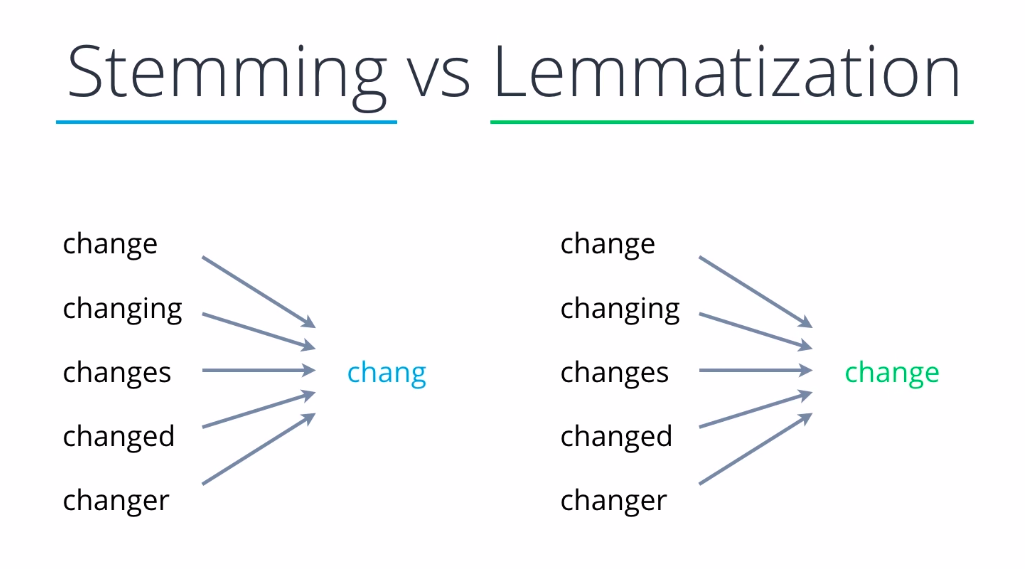

In [16]:
import nltk
from nltk.stem import PorterStemmer

In [17]:
#-- Using NLTK's Porter Stemming Algorithm
ps = PorterStemmer()
# Example inflections to reduce
example_words = ["program","programming","programer","programs","programmed"]

# Perform stemming
print("{0:20}{1:20}".format("--Word--","--Stem--"))
for word in example_words:
   print ("{0:20}{1:20}".format(word, ps.stem(word)))

--Word--            --Stem--            
program             program             
programming         program             
programer           program             
programs            program             
programmed          program             


In [18]:
#-- Using NLTK's WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")
nltk.download("omw-1.4")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [19]:
# Initialize wordnet lemmatizer
wnl = WordNetLemmatizer()

# Example inflections to reduce
example_words = ["program","programming","programer","programs","programmed", "escaped"]

# Perform lemmatization
print("{0:20}{1:20}".format("--Word--","--Lemma--"))
for word in example_words:
   print ("{0:20}{1:20}".format(word, wnl.lemmatize(word, pos="v")))


--Word--            --Lemma--           
program             program             
programming         program             
programer           programer           
programs            program             
programmed          program             
escaped             escape              


In [20]:
#-- Applying Porter Stemmer to a data frame
df['Documents_Stemmed'] = df['Documents_rmStops'].apply(lambda x: [ps.stem(word) for word in x])

#-- Applying Lemmatizer to a dataframe
df['Documents_Lemmatized'] = df['Documents_rmStops'].apply(lambda x: [wnl.lemmatize(word.lower(), pos="v") for word in x])

df.head()

,Documents,Documents_Cased,Documents_rmPunct,Documents_tokenized,Documents_rmStops,Documents_Stemmed,Documents_Lemmatized
0,An owl stuck in an iconic sculpture. After reh...,AN OWL STUCK IN AN ICONIC SCULPTURE. AFTER REH...,AN OWL STUCK IN AN ICONIC SCULPTURE. AFTER REH...,"[AN, OWL, STUCK, IN, AN, ICONIC, SCULPTURE, .,...","[OWL, STUCK, ICONIC, SCULPTURE, ., REHAB, ,, '...","[owl, stuck, icon, sculptur, ., rehab, ,, 's, ...","[owl, stick, iconic, sculpture, ., rehab, ,, '..."
1,Murder suspect who escaped GWU Hospital last m...,MURDER SUSPECT WHO ESCAPED GWU HOSPITAL LAST M...,MURDER SUSPECT WHO ESCAPED GWU HOSPITAL LAST M...,"[MURDER, SUSPECT, WHO, ESCAPED, GWU, HOSPITAL,...","[MURDER, SUSPECT, ESCAPED, GWU, HOSPITAL, LAST...","[murder, suspect, escap, gwu, hospit, last, mo...","[murder, suspect, escape, gwu, hospital, last,..."
2,"In D.C. bill, Bowser aims to curb retail theft...","IN D.C. BILL, BOWSER AIMS TO CURB RETAIL THEFT...","IN D.C. BILL, BOWSER AIMS TO CURB RETAIL THEFT...","[IN, D.C., BILL, ,, BOWSER, AIMS, TO, CURB, RE...","[D.C., BILL, ,, BOWSER, AIMS, CURB, RETAIL, TH...","[d.c., bill, ,, bowser, aim, curb, retail, the...","[d.c., bill, ,, bowser, aim, curb, retail, the..."


## 3. From Words to Numbers

#### 3.1 Word Counts

In [ ]:
df.head()

,Documents,Documents_Cased,Documents_rmPunct,Documents_tokenized,Documents_rmStops,Documents_Stemmed,Documents_Lemmatized
0,An owl stuck in an iconic sculpture. After reh...,AN OWL STUCK IN AN ICONIC SCULPTURE. AFTER REH...,AN OWL STUCK IN AN ICONIC SCULPTURE. AFTER REH...,"[AN, OWL, STUCK, IN, AN, ICONIC, SCULPTURE, .,...","[OWL, STUCK, ICONIC, SCULPTURE, ., REHAB, ,, '...","[owl, stuck, icon, sculptur, ., rehab, ,, 's, ...","[owl, stick, iconic, sculpture, ., rehab, ,, '..."
1,Murder suspect who escaped GWU Hospital last m...,MURDER SUSPECT WHO ESCAPED GWU HOSPITAL LAST M...,MURDER SUSPECT WHO ESCAPED GWU HOSPITAL LAST M...,"[MURDER, SUSPECT, WHO, ESCAPED, GWU, HOSPITAL,...","[MURDER, SUSPECT, ESCAPED, GWU, HOSPITAL, LAST...","[murder, suspect, escap, gwu, hospit, last, mo...","[murder, suspect, escape, gwu, hospital, last,..."
2,"In D.C. bill, Bowser aims to curb retail theft...","IN D.C. BILL, BOWSER AIMS TO CURB RETAIL THEFT...","IN D.C. BILL, BOWSER AIMS TO CURB RETAIL THEFT...","[IN, D.C., BILL, ,, BOWSER, AIMS, TO, CURB, RE...","[D.C., BILL, ,, BOWSER, AIMS, CURB, RETAIL, TH...","[d.c., bill, ,, bowser, aim, curb, retail, the...","[d.c., bill, ,, bowser, aim, curb, retail, the..."


In [22]:
a = ['a', 'b', 'c']
" ".join(a)

'a b c'

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
coun_vect = CountVectorizer()
count_matrix = coun_vect.fit_transform(df['Documents_Stemmed'].apply(lambda x: " ".join(x))) #-- Some algorithms don't want tokenized data
count_array = count_matrix.toarray()
df_array = pd.DataFrame(data=count_array,columns = coun_vect.get_feature_names_out())
df_array

,aim,bill,bowser,captur,curb,deal,drug,escap,free,gwu,...,murder,owl,polic,reform,rehab,retail,sculptur,stuck,suspect,theft
0,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,1,1,0,0
1,0,0,0,1,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,1,0
2,1,1,1,0,1,1,1,0,0,0,...,0,0,1,1,0,1,0,0,0,1


#### 3.2 TF-IDF

"The Dog ate the cat"

##### Background Vocabulary
- **Document**: A single instance of text
- **Corpus**: A collection of documents
- **Tokenize**: Structure a string into a list of words. Each item is a single token
- **TF-IDF Score**: A formula that tries to measure how important a given word is to a document. This helps in understanding what a document may be about.
##### **TF-IDF**
###### Term Frequency: Calculated at the document level
$$
\begin{align}
TF = \frac{Term\ Frequency}{Total\ Number\ of\ Words\ in\ Document}
\end{align}
$$
```
#-- Term Frequency Example
"The dog ate the cat"
Output [0]: {
  "The": 2/5,
  "Dog": 1/5,
  "Ate": 1/5,
  "Cat": 1/5
}
```
###### Inverse Document Frequency - Calculated at the corpus level
$$
\begin{align}
IDF = log(\frac{Number\ of\ Documents\ in\ a\ corpus}
          {Number\ of\ documents\ that\ contain\ the\ term}\ \ \ \  )
\end{align}
$$
```
#-- Inverse Document Frequency for 2 documents
[
 "The dog ate the cat",
 "The stars are bright"
]
Output [0]: {
  "The":   log(2 / 2),
  "Dog":   log(2 / 1),
  "Ate":   log(2 / 1),
  "Cat":   log(2 / 1),
  "stars": log(2 / 1),
  "are":   log(2 / 1),
  "bright":log(2 / 1),
}
```
###### TF * IDF
$$
\begin{align}
TFIDF = TF * IDF
\end{align}
$$
```
#-- TFIDF for Doc1 using corpus of Doc1 and Doc2
[
 "The dog ate the cat",
 "The stars are bright"
]
Output [0]: TFIDF for Doc 1 = {
  "The":   (2/5) * log(2 / 2),
  "Dog":   (1/5) * log(2 / 1),
  "Ate":   (1/5) * log(2 / 1),
  "Cat":   (1/5) * log(2 / 1),
  "stars": (0/5) * log(2 / 1),
  "are":   (0/5) * log(2 / 1),
  "bright":(0/5) * log(2 / 1)
}
```


Learn more about TF-IDF and the specifics of the formula [here](https://medium.com/analytics-vidhya/tf-idf-term-frequency-technique-easiest-explanation-for-text-classification-in-nlp-with-code-8ca3912e58c3).


##### TF-IDF in Sklearn

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
coun_vect = TfidfVectorizer()
count_matrix = coun_vect.fit_transform(df['Documents_Stemmed'].apply(lambda x: " ".join(x))) #-- Some algorithms don't want tokenized data
count_array = count_matrix.toarray()
df_array = pd.DataFrame(data=count_array,columns = coun_vect.get_feature_names_out())
df_array

,aim,bill,bowser,captur,curb,deal,drug,escap,free,gwu,...,murder,owl,polic,reform,rehab,retail,sculptur,stuck,suspect,theft
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.408248,0.000000,...,0.000000,0.408248,0.000000,0.000000,0.408248,0.000000,0.408248,0.408248,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.353553,0.000000,0.000000,0.000000,0.353553,0.000000,0.353553,...,0.353553,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.353553,0.000000
2,0.316228,0.316228,0.316228,0.000000,0.316228,0.316228,0.316228,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.316228,0.316228,0.000000,0.316228,0.000000,0.000000,0.000000,0.316228
